# Exploração Inicial do Dataset NSL-KDD

Este notebook apresenta uma exploração inicial do dataset NSL-KDD, incluindo análise das variáveis, distribuição das classes e visualizações básicas.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Carregamento dos Dados

Carregando o dataset processado para análise.

In [20]:
df = pd.read_csv("../data/processed/KDDTrain+.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Análise Inicial

Verificando dimensões, tipos de variáveis e informações básicas do dataset.

In [21]:
print(f"Total de amostras: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")
print(f"Features numéricas: {df.select_dtypes(include='number').shape[1]}")
print(f"Features categóricas: {df.select_dtypes(include='object').shape[1]}")
print(f"Coluna 'class' - rótulos distintos: {df['class'].nunique()}")
print(f"Coluna 'difficulty' - intervalo de valores: {df['difficulty'].min()} a {df['difficulty'].max()}")
cat_cols = df.select_dtypes(include='object').columns
print("Colunas categóricas:", list(cat_cols))



Total de amostras: 125973
Total de colunas: 43
Features numéricas: 39
Features categóricas: 4
Coluna 'class' - rótulos distintos: 23
Coluna 'difficulty' - intervalo de valores: 0 a 21
Colunas categóricas: ['protocol_type', 'service', 'flag', 'class']


## Remoção de Colunas Irrelevantes

Removendo a coluna `difficulty`, que não será utilizada na análise.

In [22]:
df = df.drop(columns=["difficulty"])

## Análise das Classes

Verificando a distribuição dos rótulos originais.

In [23]:
print("Número de classes distintas:", df["class"].nunique())
df["class"].value_counts()


Número de classes distintas: 23


class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

## Agrupamento das Classes em Categorias

Agrupando os rótulos em 5 categorias principais de ataque.

In [24]:
attack_map = {
    'normal': 'normal',
    # DoS
    'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
    'apache2': 'DoS', 'udpstorm': 'DoS', 'processtable': 'DoS', 'mailbomb': 'DoS',
    # Probe
    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'mscan': 'Probe', 'saint': 'Probe',
    # R2L
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'multihop': 'R2L', 'phf': 'R2L', 'spy': 'R2L',
    'warezclient': 'R2L', 'warezmaster': 'R2L', 'xlock': 'R2L', 'xsnoop': 'R2L', 'snmpguess': 'R2L',
    'snmpgetattack': 'R2L', 'httptunnel': 'R2L', 'sendmail': 'R2L', 'named': 'R2L',
    # U2R
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R',
    'ps': 'U2R', 'sqlattack': 'U2R', 'xterm': 'U2R'
}

df["attack_category"] = df["class"].map(attack_map)

unmapped = df[df["attack_category"].isna()]
print("Labels não mapeadas:", unmapped["class"].unique())


Labels não mapeadas: []


In [25]:
category_counts = df["attack_category"].value_counts()
print("Contagem por categoria:\n")
print(category_counts)


Contagem por categoria:

attack_category
normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64


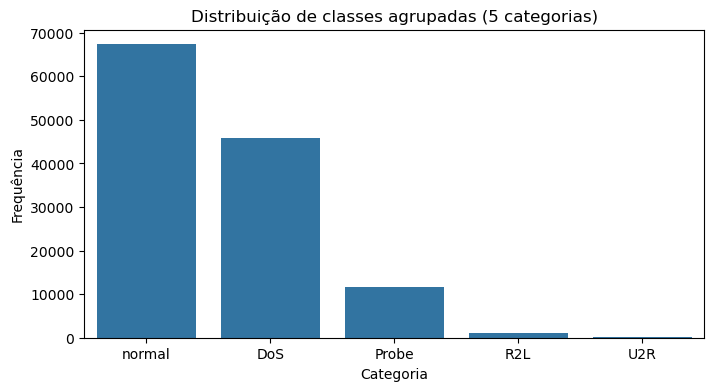

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(x="attack_category", data=df, order=df["attack_category"].value_counts().index)
plt.title("Distribuição de classes agrupadas (5 categorias)")
plt.xlabel("Categoria")
plt.ylabel("Frequência")
plt.show()

## Análise das Variáveis Categóricas

Explorando as colunas categóricas: `protocol_type`, `service` e `flag`.

In [27]:
cat_cols = df.select_dtypes(include="object").columns
print("Colunas categóricas:", list(cat_cols))

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")

Colunas categóricas: ['protocol_type', 'service', 'flag', 'class', 'attack_category']
protocol_type: 3 valores únicos
service: 70 valores únicos
flag: 11 valores únicos
class: 23 valores únicos
attack_category: 5 valores únicos


Valores únicos de 'protocol_type': ['tcp' 'udp' 'icmp']
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64


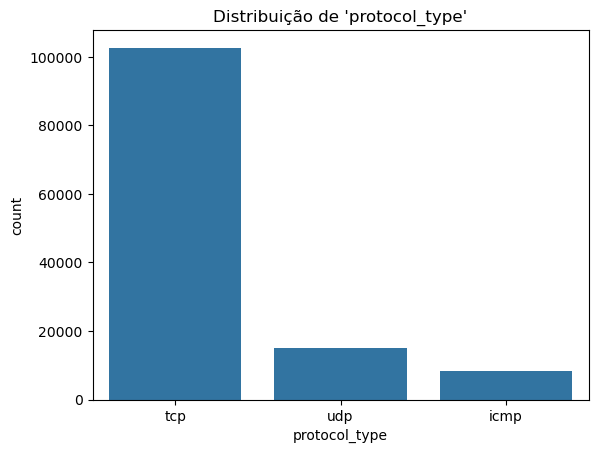

In [28]:
print("Valores únicos de 'protocol_type':", df["protocol_type"].unique())
print(df["protocol_type"].value_counts())

sns.countplot(x="protocol_type", data=df)
plt.title("Distribuição de 'protocol_type'")
plt.show()


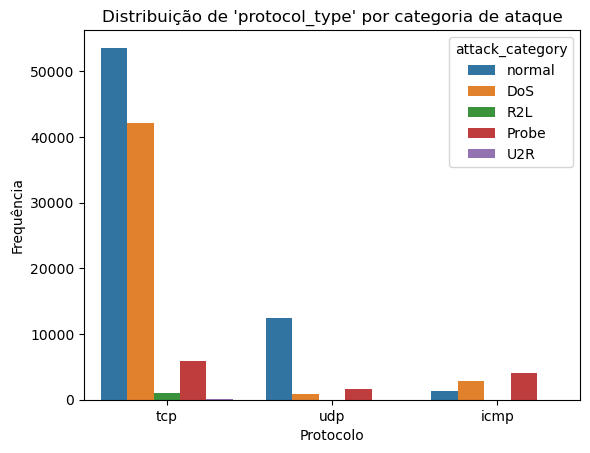

In [33]:
sns.countplot(x="protocol_type", hue="attack_category", data=df)
plt.title("Distribuição de 'protocol_type' por categoria de ataque")
plt.ylabel("Frequência")
plt.xlabel("Protocolo")
plt.show()

Total de valores únicos em 'service': 70
Top 10 serviços mais frequentes:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
eco_i        4586
other        4359
ecr_i        3077
telnet       2353
finger       1767
Name: count, dtype: int64


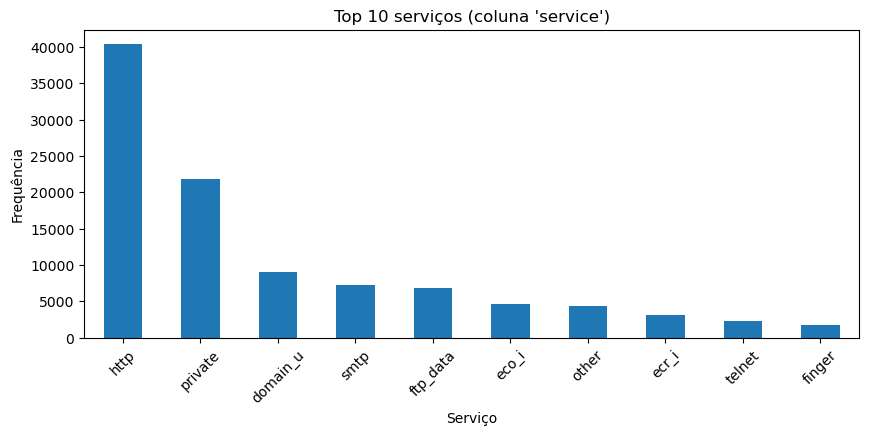

In [34]:
print(f"Total de valores únicos em 'service': {df['service'].nunique()}")
print("Top 10 serviços mais frequentes:")
print(df["service"].value_counts().head(10))

plt.figure(figsize=(10, 4))
df["service"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 serviços (coluna 'service')")
plt.ylabel("Frequência")
plt.xlabel("Serviço")
plt.xticks(rotation=45)
plt.show()


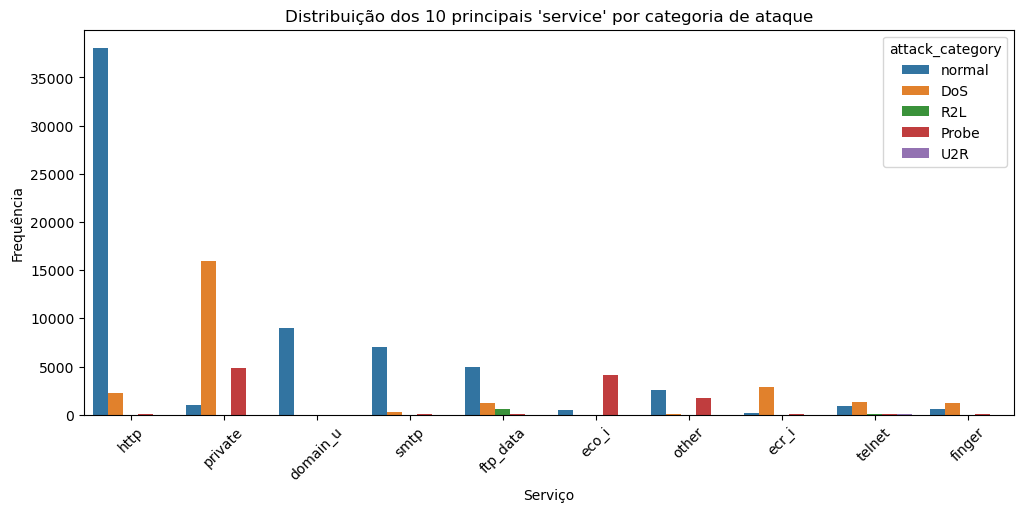

In [39]:
top_services = df["service"].value_counts().nlargest(10).index
df_top_services = df[df["service"].isin(top_services)]

plt.figure(figsize=(12, 5))
sns.countplot(x="service", hue="attack_category", data=df_top_services,
              order=top_services)
plt.title("Distribuição dos 10 principais 'service' por categoria de ataque")
plt.ylabel("Frequência")
plt.xlabel("Serviço")
plt.xticks(rotation=45)
plt.show()


Valores únicos em 'flag': 11
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64


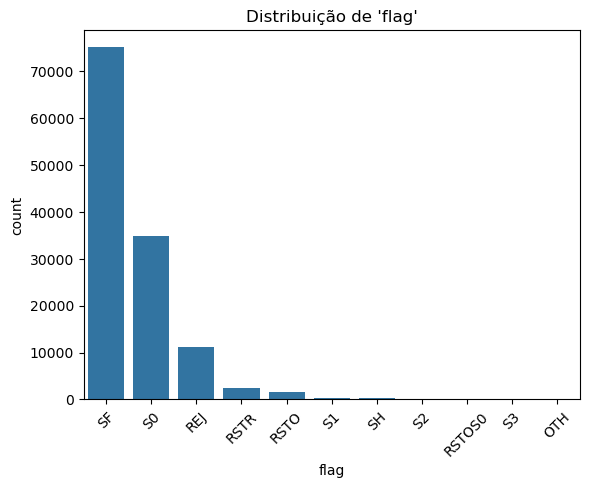

In [40]:
print(f"Valores únicos em 'flag': {df['flag'].nunique()}")
print(df["flag"].value_counts())

sns.countplot(x="flag", data=df, order=df["flag"].value_counts().index)
plt.title("Distribuição de 'flag'")
plt.xticks(rotation=45)
plt.show()


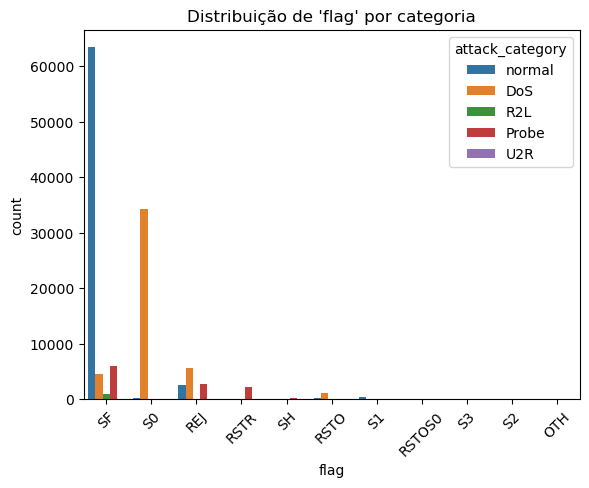

In [41]:
sns.countplot(x="flag", hue="attack_category", data=df)
plt.xticks(rotation=45)
plt.title("Distribuição de 'flag' por categoria")
plt.show()

## Análise das Variáveis Numéricas

Visualizando a matriz de correlação entre as variáveis numéricas.

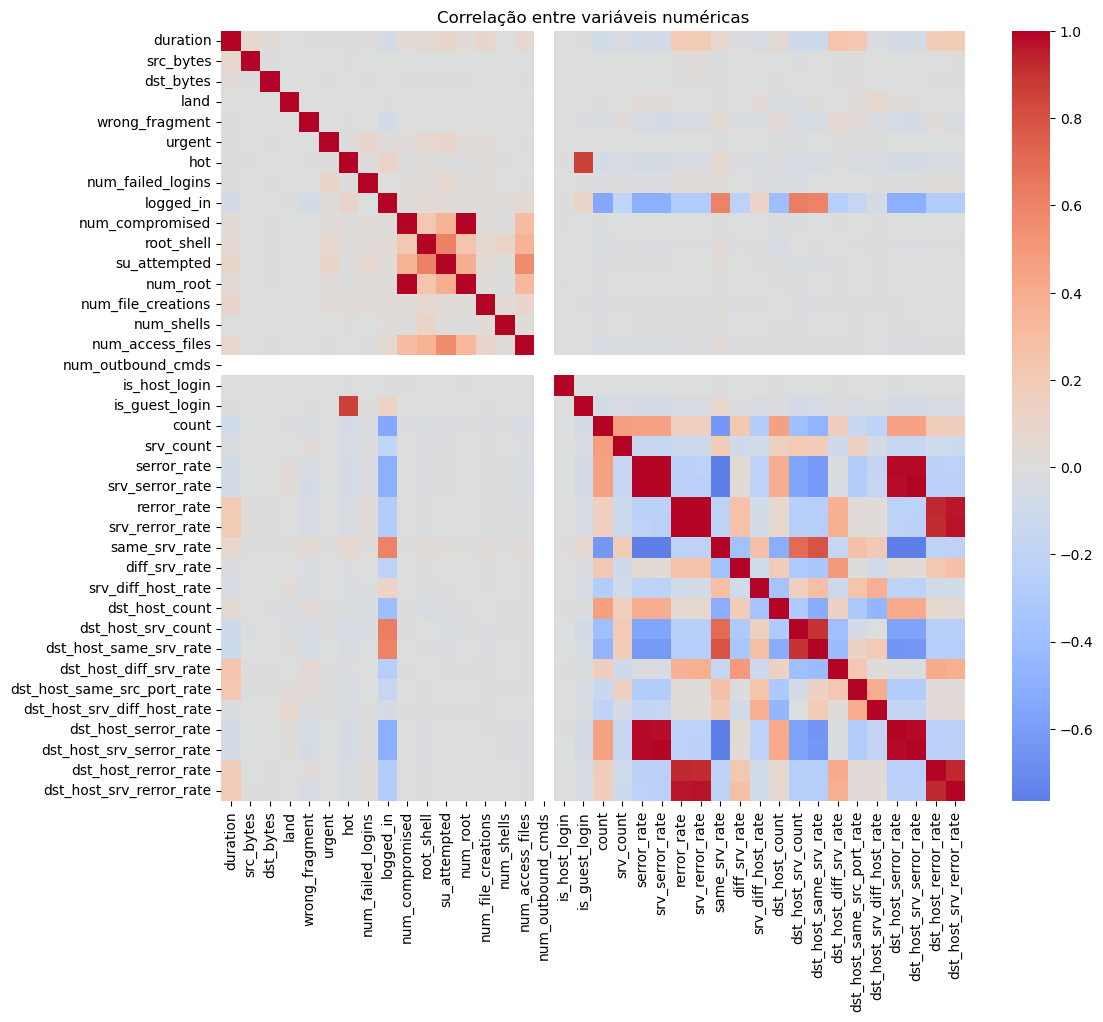

In [42]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlação entre variáveis numéricas")
plt.show()
